## 4chan website data analysis

###### The project is divided into four parts :
1. Extraction/Cleaning <br>
2. Exploratory Analysis <br>
3. Discriminative Analysis <br>
4. Modeling <br>

Following functions are defined for data preprocessing and analysis:
1. preprocessText(sentence): Preprocess comment and replies text <br>
2. preprocess(rawData): Preprocess data <br>
3. getComments(threads): Extract comments from all threads <br>
4. getReplies(threads): Extract replies to all the comments <br>
5. plotCommonWordsWithComments(data): Find common words in comments <br>
6. plotCommonWordsWithAllText(data): Find common words in comments and replies<br>
7. plotCommonWords(text): This function is called by 5th and 6th function for finding and plotting most common words.

Detailed description of all the functions is given in the comments section.

###### Analysis Results
The analysis are shown in the form of graphs for each channel. Deatiled analysis result are given in their respective sections.

In [1]:
import json 
import pandas as pd
from pandas.io.json import json_normalize
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')


In [2]:
# The function cleanses the given text by removing sepcial characters, html and stopwords. It also applies stemming and lemmatization.
def preprocessText(sentence):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')+ ['quot']]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [3]:
# The function flattens the nested Json object and extracts thread information. 
# It sorts the threads based on the created time.
# It drops unnecessary columns and comments which are null and extracts 100 most recent threads.
def preprocess(rawData):
    data = pd.concat([pd.DataFrame(json_normalize(x)) for x in rawData['threads']], sort=True,ignore_index=True)
    data['time']=pd.to_datetime(data['time'])
    data= data.sort_values(by='time', ascending=False)
    data= data[['no','com','now','replies','last_replies','name']]
    data = data[data['com'].notna()]
    data['com'] = [preprocessText(text) for text in data['com'] ]
    data.rename(columns={'no':'thread_ID',
                          'now':'time'}, 
                 inplace=True)
    data= data.head(100)
    display(data.head())
    return data
    

In [4]:
# The fuction returns comments from all the threads as a single paragraph.
def getComments(threads):
    threads['com'] = [BeautifulSoup(text).get_text() for text in threads['com'] ]
    comments=""
    for i, j in threads.iterrows():
        comments= comments+j['com']
    
    return comments
    

In [5]:
# The fuction extracts replies from all the threads and return the replies as a single paragraph.
def getReplies(threads):
    threads['last_replies']= threads['last_replies'].apply(lambda d: d if isinstance(d, list) else [])

    rep= pd.concat([pd.DataFrame(json_normalize(x)) for x in threads['last_replies']], sort=True,ignore_index=True)
    rep = rep[rep['com'].notna()]
    rep['com'] = [BeautifulSoup(text).get_text() for text in rep['com'] ]
    replies=""

    for i, j in rep.iterrows():
        replies= replies+j['com']
    
    replies= preprocessText(replies)
    return replies

In [6]:
# The function is used by plotCommonWordsWithComments() and plotCommonWordsWithAllText() to find the most common 20 words.
def plotCommonWords(text):
    tokenized = nltk.word_tokenize(text)
    # Extract nouns from the tokens.
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if(pos[:2] == 'NN')]
    # Create Frequent Distribution Object for nouns.
    cts= nltk.FreqDist(nouns)
    # Plot 20 most common words.
    rslt = pd.DataFrame(cts.most_common(20),
                    columns=['Word', 'Frequency'])
    print(rslt['Word'].tolist())
    cts.plot(20, cumulative=False)


In [7]:
# The function finds the most common 20 words from comments.
def plotCommonWordsWithComments(data):
    comments= getComments(data)
    plotCommonWords(comments)


In [8]:
# The function finds the most common 20 words from comments and replies.
def plotCommonWordsWithAllText(data):
    comments= getComments(data)
    replies= getReplies(data)
    text=  comments+replies
    plotCommonWords(text)


### Step 1: Cleansing/ Extraction
##### For preprocessing the data, following steps are done:
1. Thread information is extracted from the nested JSON Object. <br>
2. Dataframe is sorted based on the created time of thread.<br>
3. Drop unnecessary columns like sub, filename, w, h etc. <br>
4. Renaming few columns. <br>
5. Cleansing of comments. <br>
6. Extracting 100 most recent threads. <br>


In [9]:
print(" Technology Data")
techData= pd.read_json('D:/Data/catalogTechnology.json')
techData= preprocess(techData)

print(" TV & Film Data")
tvData= pd.read_json('D:/Data/catalogTV.json')
tvData= preprocess(tvData)

print(" Food & Cooking Data")
foodData= pd.read_json('D:/Data/catalogFood.json')
foodData= preprocess(foodData)

print(" Literature Data")
litData= pd.read_json('D:/Data/catalogLiterature.json')
litData= preprocess(litData)

 Technology Data


,thread_ID,com,time,replies,last_replies,name
4,75802972,websites nowadays look giant hero image carous...,05/07/20(Thu)21:48:29,1,"[{'no': 75802993, 'now': '05/07/20(Thu)21:50:2...",Anonymous
27,75802922,portable electronics battery component far sho...,05/07/20(Thu)21:44:30,1,"[{'no': 75802946, 'now': '05/07/20(Thu)21:46:1...",Anonymous
8,75802908,prove brainlets ents,05/07/20(Thu)21:43:15,8,"[{'no': 75802971, 'now': '05/07/20(Thu)21:48:2...",Anonymous
41,75802864,buy learn make video game bots,05/07/20(Thu)21:39:07,0,NaN,Anonymous
19,75802824,ready first non shit monitor since,05/07/20(Thu)21:36:32,2,"[{'no': 75802938, 'now': '05/07/20(Thu)21:45:4...",Anonymous


 TV & Film Data


,thread_ID,com,time,replies,last_replies,name
5,133419112,star wars,05/08/20(Fri)00:57:07,1,"[{'no': 133419146, 'now': '05/08/20(Fri)00:58:...",Anonymous
4,133419084,gameboy chocolate cake,05/08/20(Fri)00:56:04,3,"[{'no': 133419124, 'now': '05/08/20(Fri)00:57:...",Anonymous
9,133419042,cynical,05/08/20(Fri)00:54:52,2,"[{'no': 133419063, 'now': '05/08/20(Fri)00:55:...",Anonymous
59,133418988,uncertain times,05/08/20(Fri)00:53:20,0,NaN,Anonymous
68,133418920,people mean soul soulless,05/08/20(Fri)00:51:36,0,NaN,Anonymous


 Food & Cooking Data


,thread_ID,com,time,replies,last_replies,name
0,14060735,ourguy,05/09/20(Sat)20:42:18,1,"[{'no': 14060741, 'now': '05/09/20(Sat)20:43:1...",Anonymous
1,14060733,quarantine made delivery places full retard,05/09/20(Sat)20:41:56,1,"[{'no': 14060740, 'now': '05/09/20(Sat)20:42:5...",Anonymous
16,14060706,never eaten steak didnt enjoy even raw well do...,05/09/20(Sat)20:35:10,1,"[{'no': 14060715, 'now': '05/09/20(Sat)20:37:4...",Anonymous
34,14060658,subway headquarters town live ask anything,05/09/20(Sat)20:17:46,2,"[{'no': 14060662, 'now': '05/09/20(Sat)20:19:0...",Anonymous
29,14060652,great debate,05/09/20(Sat)20:16:40,7,"[{'no': 14060673, 'now': '05/09/20(Sat)20:24:0...",Anonymous


 Literature Data


,thread_ID,com,time,replies,last_replies,name
3,15321150,fantasy itch finishing malazan book fallen nar...,05/09/20(Sat)20:44:10,0,NaN,Anonymous
4,15321143,literature explores suicide,05/09/20(Sat)20:43:18,1,"[{'no': 15321149, 'now': '05/09/20(Sat)20:44:1...",Anonymous
27,15321096,eliot reads love song alfred prufrock,05/09/20(Sat)20:36:38,1,"[{'no': 15321110, 'now': '05/09/20(Sat)20:39:1...",Anonymous
32,15321090,christian literature fiction read,05/09/20(Sat)20:36:02,0,NaN,Anonymous
35,15321076,people reading based deleuze,05/09/20(Sat)20:34:28,0,NaN,Anonymous


### Step 2: Exploratory Analysis.

#### Following analysis are performed on each channel to gain more insights.
1. Common words for each Channel. <br>
2. Changes in the common words found by using additional data ( replies ). <br>
3. Number of replies for each Channel. <br>
4. Percentage of Anonymous authors for each Channel. 


##### 1. Common words for Each Channel.
The common words for each channel are analysed in this step. For finding the common words, the comment text is analyzed. Stemming and lemmatization is applied to the comment text using the preprocessText() function. After the preprocessing, the comments are tokenized and nouns are extracted from the tokens. The common words are found from the nouns. Extracting nouns is an important step in this process becuase it ignores the irrelevant words like 'really','well','even','could', etc which are commonly used in a sentence. By analyzing only nouns from the comments, relevant words to the channel are found. <br>
<br>
20 most common words for each channel are visualized in the following plots. The applied method for finding common words have given good results. It can be seen that for Technology, relevant words like battery, power, gnu, performance, cpu, linux etc are found. Similarly, all the others channels also show relevant common words.

Most common words for Technology
['battery', 'power', 'gnu', 'jessica', 'anything', 'use', 'image', 'performance', 'years', 'software', 'models', 'time', 'point', 'shit', 'cpu', 'budget', 'something', 'support', 'get', 'linux']


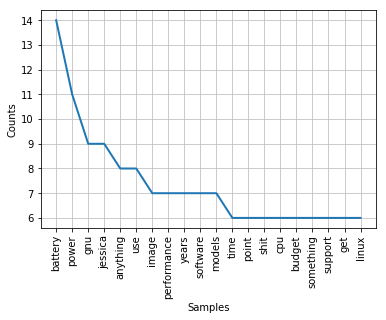

Most common words for TV & Film
['movie', 'people', 'watch', 'kino', 'gon', 'scene', 'series', 'season', 'star', 'cinematography', 'directors', 'world', 'time', 'action', 'face', 'men', 'body', 'night', 'jimmy', 'balls']


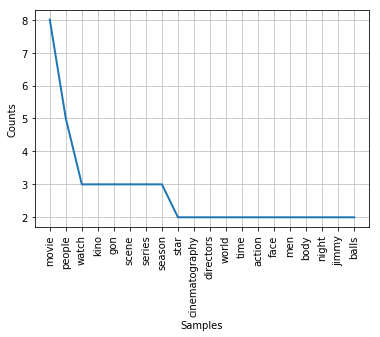

Most common words for Food & Cooking
['food', 'sauce', 'place', 'sugar', 'use', 'hour', 'people', 'order', 'guys', 'tea', 'half', 'hours', 'family', 'beef', 'pizza', 'ingredients', 'dinner', 'lot', 'consistency', 'recipes']


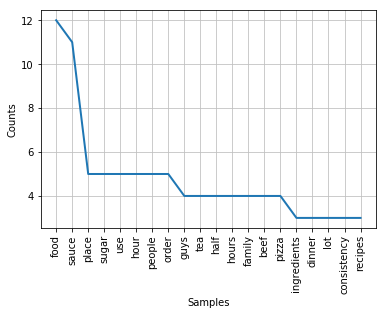

Most common words for Literature
['book', 'reminder', 'time', 'books', 'blood', 'life', 'people', 'thoughts', 'literature', 'data', 'something', 'peace', 'gon', 'ideas', 'years', 'way', 'world', 'mages', 'war', 'pic']


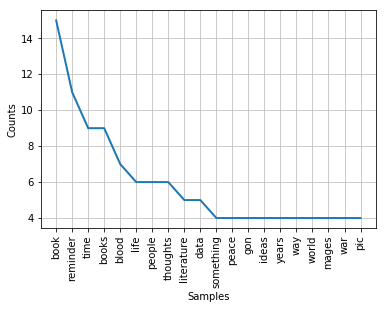

In [10]:
print("Most common words for Technology")
plotCommonWordsWithComments(techData)

print("Most common words for TV & Film")
plotCommonWordsWithComments(tvData)

print("Most common words for Food & Cooking")
plotCommonWordsWithComments(foodData)

print("Most common words for Literature")
plotCommonWordsWithComments(litData)

##### 2. Common words for each channel using additional information.
In this section, the common words are analysed by adding more information. Here the additional information is the text from replies. It can be seen in the resultant graphs that the relevancy of the words for each channel increases on adding replies. We can deduce that the replies text contains relevant words to the channel. Hence to find most common/ relevant words to the channels, we must use text from comments along with text from replies.

Most common words for Technology
['software', 'people', 'use', 'time', 'something', 'data', 'anything', 'battery', 'years', 'power', 'get', 'point', 'way', 'code', 'performance', 'support', 'work', 'classes', 'hardware', 'everything']


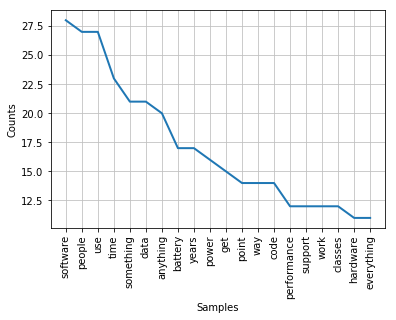

Most common words for TV & Film
['movie', 'people', 'time', 'someone', 'film', 'something', 'face', 'movies', 'power', 'season', 'post', 'kino', 'everyone', 'thing', 'man', 'ass', 'guy', 'star', 'balls', 'life']


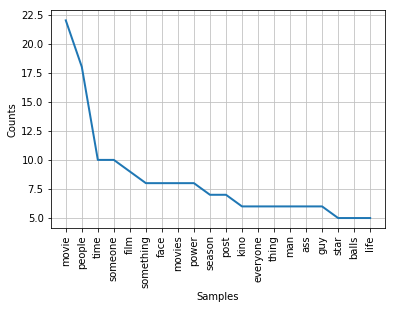

Most common words for Food & Cooking
['food', 'people', 'sauce', 'time', 'pizza', 'meat', 'day', 'eat', 'place', 'flavor', 'lot', 'sugar', 'thing', 'anything', 'way', 'use', 'nothing', 'guys', 'taste', 'beef']


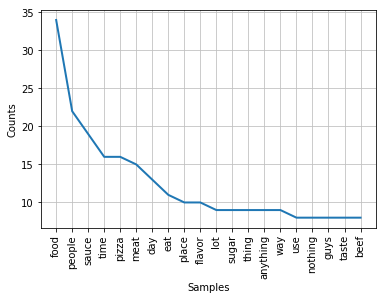

Most common words for Literature
['book', 'people', 'time', 'books', 'life', 'something', 'anything', 'work', 'way', 'world', 'reminder', 'man', 'everything', 'day', 'thing', 'anon', 'things', 'literature', 'blood', 'thoughts']


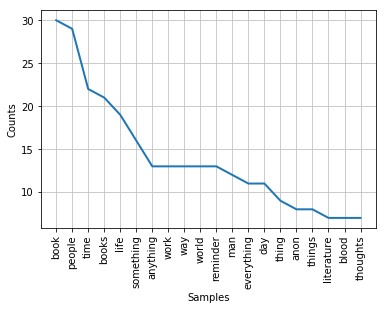

In [11]:
print("Most common words for Technology")
plotCommonWordsWithAllText(techData)

print("Most common words for TV & Film")
plotCommonWordsWithAllText(tvData)

print("Most common words for Food & Cooking")
plotCommonWordsWithAllText(foodData)

print("Most common words for Literature")
plotCommonWordsWithAllText(litData)

##### 3. Number of replies for each Channel.
The number of replies per thread are analysed in this step. The following graphs show the distribution of replies per thread for each channel. It can be seen from the graphs that most of the threads have replies between 0 to 20. Only few threads have replies more than 80. The pattern of replies is similar for all the channels. Technology channel is the only channel which had around 2-3 threads which have 250 replies.

Text(0, 0.5, 'Number of threads')

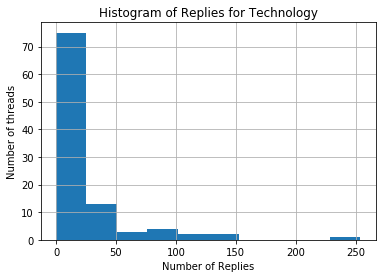

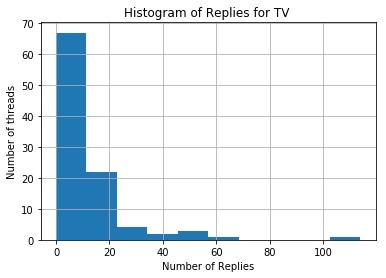

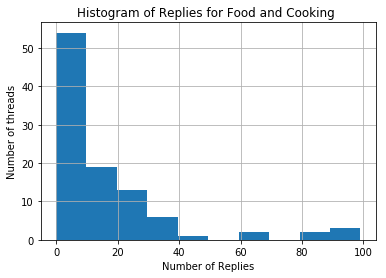

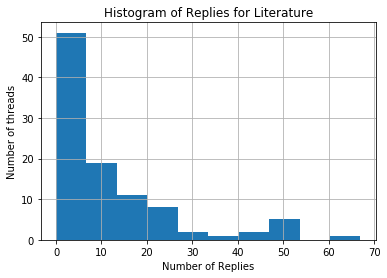

In [12]:
techData.hist(column='replies')
plt.title("Histogram of Replies for Technology")
plt.xlabel("Number of Replies")
plt.ylabel("Number of threads")

tvData.hist(column='replies')
plt.title("Histogram of Replies for TV ")
plt.xlabel("Number of Replies")
plt.ylabel("Number of threads")

foodData.hist(column='replies')
plt.title("Histogram of Replies for Food and Cooking ")
plt.xlabel("Number of Replies")
plt.ylabel("Number of threads")

litData.hist(column='replies')
plt.title("Histogram of Replies for Literature")
plt.xlabel("Number of Replies")
plt.ylabel("Number of threads")


##### 4. Percentage of Anonymous authors for each Channel
The percentage of anonymous authors for each channel is analyzed in this step. For all the channels more than 90% authors are anonymous. 

In [13]:
tvUsers= tvData['name'].value_counts(normalize=True) * 100
techUsers= techData['name'].value_counts(normalize=True) * 100
foodUsers= foodData['name'].value_counts(normalize=True) * 100
litUsers= litData['name'].value_counts(normalize=True) * 100

print("Percentage of Anonymous Users in Technology")
print(techUsers)

print("\nPercentage of Anonymous Users in Tv & Films")
print(tvUsers)

print("\nPercentage of Anonymous Users in Food & Cooking")
print(foodUsers)

print(" \nPercentage of Anonymous Users in Literature")
print(litUsers)

Percentage of Anonymous Users in Technology
Anonymous                   98.0
chr21328                     1.0
HDD Read/Write questions     1.0
Name: name, dtype: float64

Percentage of Anonymous Users in Tv & Films
Anonymous    100.0
Name: name, dtype: float64

Percentage of Anonymous Users in Food & Cooking
Anonymous                      93.0
New kid on block                3.0
Me                              1.0
ITS UP111                       1.0
sloppy joe in a hot dog bun     1.0
Anonmouse                       1.0
Name: name, dtype: float64
 
Percentage of Anonymous Users in Literature
Anonymous    99.0
Squeegee      1.0
Name: name, dtype: float64


### Step 3: Discriminative Analysis.

From the exploratory analysis, we can see that the common words can be used to differentiate between the Channels. 

Suppose we want to identify the channel for the following thread.
1. T1 comment :  Data analysis is defined as a process of cleaning, transforming, and modeling data to discover useful information for business decision-making. <br>
2. T2 comment: Healthy eating is about eating smart and enjoying your food.<br>

As shown in exploratory analysis, following are the common words for each channel.<br>
<br>
Technology <br>
['software', 'people', 'use', 'time', 'something', 'data', 'anything', 'battery', 'years', 'power', 'get', 'point', 'way', 'code', 'performance', 'support', 'work', 'classes', 'hardware', 'everything'] <br>
<br>
Food & Cooking <br>
['food', 'people', 'sauce', 'time', 'pizza', 'meat', 'day', 'eat', 'place', 'flavor', 'lot', 'sugar', 'thing', 'anything', 'way', 'use', 'nothing', 'guys', 'taste', 'beef'] <br>
<br>
Literature<br>
['book', 'people', 'time', 'books', 'life', 'something', 'anything', 'work', 'way', 'world', 'reminder', 'man', 'everything', 'day', 'thing', 'anon', 'things', 'literature', 'blood', 'thoughts']<br>
<br>
TV & Films<br>
['movie', 'people', 'time', 'someone', 'film', 'something', 'face', 'movies', 'power', 'season', 'post', 'kino', 'everyone', 'thing', 'man', 'ass', 'guy', 'star', 'balls', 'life'] 
<br>

T1 has most common words in Technology channel. The matched word is data.
T2 has most common words in Food & Cooking channel. the matech words are eat and food.
Hence T1 belongs to Technology channel and T2 belongs to Food & Cooking channel.

In the above example, only 20 most common words are used for classification. Increasing the number of common words used can greatly improve the classification results. Care must be taken not to increase the number very high as this might result in same words belonging to multiple channels. The may result in overlapping of channels.

<br>
Note: Classification using multiple features can improve the classification results. For eg, country/state can be used as a feature for classification. If channel X is very popular in country Y and a thread is created in country Y, there is a high probablity that the thread belongs to the channel X. But the country feature can't solely be used as a feature for classification. It must be used along prominant features like 'common words'.

### Step 4: Modeling

Bag of words model is used to classify the channels. Following steps are done: <br>
1. Creating Dataset <br>
2. Splitting train and test data <br>
3. Create Feature vectors <br>
4. Create random forest classifier and fit the forest to the training set, using the bag of words as features and the channel type as the response variable.<br>
5. Calculate Accuracy<br>


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Create Dataset
selected_columns = tvData[['com']]
modelDataTv = selected_columns.copy()
modelDataTv['type']= 'tv'

selected_columns = techData[['com']]
modelDataTech = selected_columns.copy()
modelDataTech['type']= 'tech'

selected_columns = foodData[['com']]
modelDataFood = selected_columns.copy()
modelDataFood['type']= 'food'

selected_columns = litData[['com']]
modelDataLit = selected_columns.copy()
modelDataLit['type']= 'literature'

modelData= modelDataTv.append(modelDataTech)
modelData= modelData.append(modelDataFood)
modelData= modelData.append(modelDataLit)
display(modelData.shape)
display(modelData.head(5))
 

(400, 2)

,com,type
5,star wars,tv
4,gameboy chocolate cake,tv
9,cynical,tv
59,uncertain times,tv
68,people mean soul soulless,tv


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 6000) 

train_data_features = vectorizer.fit_transform(modelData['com'])
train_data_features = train_data_features.toarray()
print (train_data_features.shape)

(400, 3259)


In [16]:
from sklearn.model_selection import train_test_split

#Split dataset into training and testing data
x_train,x_test,y_train,y_test=train_test_split(train_data_features,modelData['type'],test_size=0.2,random_state=0)
print("Splitting Done")

Splitting Done


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as features and the sentiment labels as the response variable
forest = forest.fit(x_train, y_train )


In [18]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
#checking accuracy score

result = forest.predict(x_test)
accuracy=accuracy_score(y_test,result)
print("Accuracy percentage")
print(accuracy*100)


Accuracy percentage
55.00000000000001
